### DEMOGRAPHIC OF THE POLICE DEPARTMENT IN CHAPEL HILL, NORTH CAROLINA

In [21]:
import numpy as np                 
import pandas as pa                  
import matplotlib.pyplot as plt      
import seaborn as sn 

In [22]:
ped = pa.read_csv('/Users/sandraketa/desktop/police-employee-demographics.csv', sep = ';')

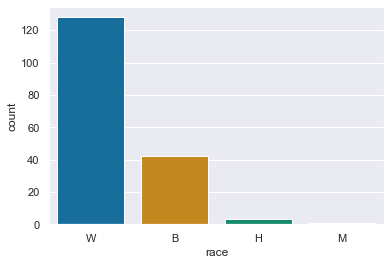

In [23]:
sn.set(style="darkgrid")
COUNT_RACE = sn.countplot(x="race", data=ped, palette = "colorblind")

From this graph, we can tell that the number of white police employees is much larger than the number of minority police employees. 

### MANIPULATING THE DATA TO BE NUMERIC

In [24]:
pam = pa.read_csv('/Users/sandraketa/desktop/Data_Analysis-Group-Project/police-arrests-made.csv', sep = ';')

##### Violent Crime Codes:
    * 0110 - Murder-First Degree-Attempt
    * 0640 - B&E-Vehicle
    * 0200 - Rape 1st Degree
    * 0300 - Common Law Robbery
    * 0410 - Assault Inflicting Serious Injury
    * 0411 - Assault LEO & Inflicting Injury
    * 0510 - B&E Misdemeanor
    * 0810 - Assault & Battery
    * 0811 - Assault on Government Official
    * 0820 - Communicate Threats
    * 1530 - Carrying Concealed Weapon Illegally
    * 1550 - Discharging Firearm/ BB Gun
    * 1590 - Possessing Weapon of Mass Destruction
    * 1710 - Peeping
    * 1720 - Crime against Nature
    * 1730 - Indecent Exposure
    * 1770 - Statutory Rape/Sex Offense
    * 1780 - Child Indecent Liberties
    * 2030 - Contributing to the Delinquency of a Minor
    * 2090 - Assault on a Female
    * 2100 - Impaired Driving DWI
    * 2212 - Underage Possession of Spiritious Liquor
    * 2214 - Open Container
    * 2222 - Underage Possession
    * 2223 - Driver Consuming
    * 2230 - Aid & Abet Underage Alcohol Usage
    * 2240 - Consuming ON OFF Premises
    * 2290 - Consuming on Unauthorized Premises
    * 2410 - Disorderly Conduct
    * 2430 - Fighting
    * 2440 - Failure to Disperse
    * 2450 - Drunk/Dispruptive
    * 2490 - False Imprisonment
    * 2520 - Dissemination of Obscene Material to a Minor (Under 16)
    * 2570 - Exploiting Child
    * 2590 - Performing Harmful or Obscene acts in front of a minor
    * 2620 - Kidnapping
    * 2630 - Resising Arrest
    * 2640 - Violating Domestic Violence Protective Order
    * 2650 - Obstructing LEO Work
    * 2660 - Parole Violation
    * 2670 - 2nd Degree Trespassing
    * 2680 - Public Urination
    * 2690 - Fugitive
    * 4010 - Driving While License Revoked
    
    
##### Property Crime Codes:
    * 0620 - Larceny from person
    * 0630 - Larceny (Switch Price Tag)
    * 0670 - Break Coin Machine
    * 0690 - Larceny All other
    * 0710 - MV Theft - Automobile
    * 0900 - Arson 1st Degree
    * 1015 - Forgery-Uttering
    * 1027 - Counterfeiting
    * 1110 - Fraud - Worthless Check
    * 1120 - Possession of Fraudulent ID
    * 1140 - Unauthorized use of Conveyance
    * 1150 - Credit Card Fraud
    * 1170 - Identity Theft
    * 1180 - Accessing Computers
    * 1190 - Manufacturing Fraudulent Forms of ID
    * 1210 - Embezzlement
    * 1290 - Larceny by Employees
    * 1310 - Recreational Stolen Goods
    * 1320 - Larceny from Person
    * 1330 - Possession of Stolen Goods
    * 1400 - Damage-Personal Property
    * 2020 - Non-Support Child
    * 9910 - Littering
    
##### Narcotic Crime Codes:
    * 1810 - Poss Narcotics
    * 1820 - Drugs-Counterfeit
    * 1834 - Drug Paraphernalia
    * 1890 - Drugs on School Property

In [27]:
pam = pa.read_csv('/Users/sandraketa/desktop/Data_Analysis-Group-Project/police-arrests-made.csv', sep = ';')

pam_dict1 = {x:'Violent Crime' for x in list(set(pam.ucr_code))
             if x in [110,640,200,300,410,411,510,810,811,820,1530
                      ,1550,1590,1710,1720,1730,1770,1780,2030,2090,2100,2212,
                      2214,2222,2223,2230,2240,2290,2410,2430,2440,2450,2490,
                      2520,2570,2590,2620,2630,2640,2650,2670,2680,2690,4010]}
pam_dict2 = {x:'Property Crime' for x in list(set(pam.ucr_code)) 
             if x in[620,630,670,690,710,900,1015,1027,1110,1120,1140,1150,1170,1180,1190,1210,1290,1310,1320,
                      1330,1400,2020]}
pam_dict3 = {x:'Narcotic Crime' for x in list (set(pam.ucr_code))
             if x in [1810,1820,1834,1890]}

pam_dict1.update(pam_dict2) 

pam_dict1.update(pam_dict3) 

pam_2 = pam.copy()   
    
pam_2.ucr_code = pam_2.ucr_code.map(pam_dict1)

In [29]:
set(pam_2.ucr_code)

{'Narcotic Crime', 'Property Crime', 'Violent Crime', nan}

In [30]:
pam = pa.read_csv('/Users/sandraketa/desktop/Data_Analysis-Group-Project/police-arrests-made.csv', sep = ';')

pam_2_dict4 = {x: 0 for x in list(set(pam_2.ucr_code))
             if x in ['Violent Crime']}
pam_2_dict5 = {x: 1 for x in list(set(pam_2.ucr_code)) 
             if x in['Property Crime']}
pam_2_dict6 = {x: 2 for x in list (set(pam_2.ucr_code))
             if x in ['Narcotic Crime']}

pam_2_dict4.update(pam_2_dict5) 

pam_2_dict4.update(pam_2_dict6) 

pam_3 = pam_2.copy()   
    
pam_3.ucr_code = pam_3.ucr_code.map(pam_2_dict4)  

In [31]:
set(pam.arrestee_s_race)

{'A', 'B', 'H', 'I', 'O', 'U', 'W', nan}

In [33]:
def onehot(df, feature):
    '''A function to do one-hot-encoding of a feature from a dataframe. df = dataframe'''

    pamv = list(set(df[feature])) 
    
    for c in df.index: 
        t = df.loc[c, feature]
        
        for test in pamv:
            if pa.isna(test):  
                if pa.isna(t):
                    df.loc[c, '{}_nan'.format(feature)] = 1
                else:
                    df.loc[c, '{}_nan'.format(feature)] = 0
            else:
                if t == test:
                    df.loc[c, '{}_{}'.format(feature, test)] = 1  
                                                             
                else:
                    df.loc[c, '{}_{}'.format(feature, test)] = 0 
            
    return df.drop(feature, axis=1) 

In [34]:
pam_hot1 = onehot(pam_3, 'arrestee_s_race')